In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

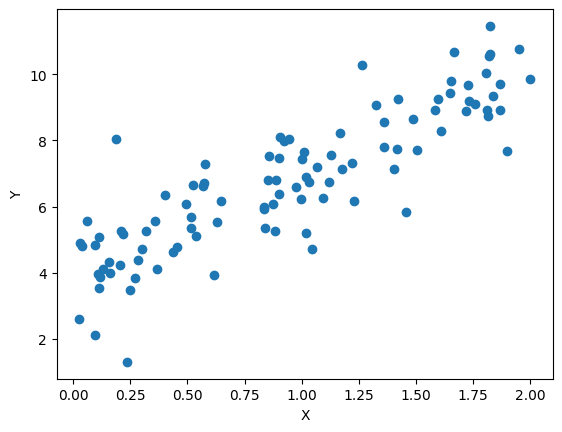

In [8]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
x_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.86161684],
       [3.11125456]])

In [15]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86161684],
       [10.08412596]])

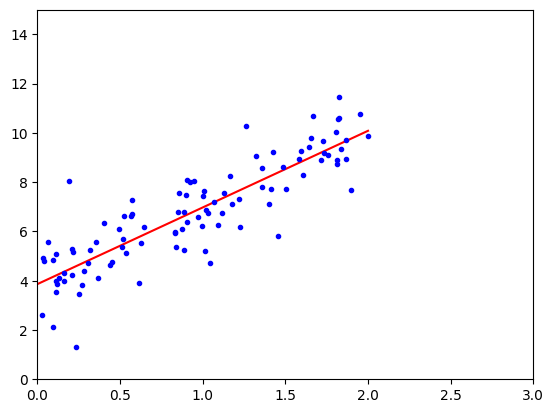

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86161684]), array([[3.11125456]]))

In [26]:
lin_reg.predict(X_new)

array([[ 3.86161684],
       [10.08412596]])

In [27]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[3.86161684],
       [3.11125456]])

In [29]:
np.linalg.pinv(x_b).dot(y)

array([[3.86161684],
       [3.11125456]])

In [30]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [31]:
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[3.86161684],
       [3.11125456]])